# Movie Dataset Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.float_format = "{:.2f}".format

#### Import Dataset

In [2]:
df = pd.read_csv("../../Data/movies_complete.csv", parse_dates=["release_date"])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     44691 non-null  int64         
 1   title                  44691 non-null  object        
 2   tagline                20284 non-null  object        
 3   release_date           44657 non-null  datetime64[ns]
 4   genres                 42586 non-null  object        
 5   belongs_to_collection  4463 non-null   object        
 6   original_language      44681 non-null  object        
 7   budget_musd            8854 non-null   float64       
 8   revenue_musd           7385 non-null   float64       
 9   production_companies   33356 non-null  object        
 10  production_countries   38835 non-null  object        
 11  vote_count             44691 non-null  float64       
 12  vote_average           42077 non-null  float64       
 13  p

Table with almost 45.000 Rows and 21 Columns

In [4]:
#add more Columns

df["profit_musd"] = df["revenue_musd"] - df["budget_musd"]
df["return"] = df.apply(lambda row: row["revenue_musd"] / row["budget_musd"], axis=1)
df["year_release"] = df["release_date"].dt.year

##### Check Dataset Anomaly

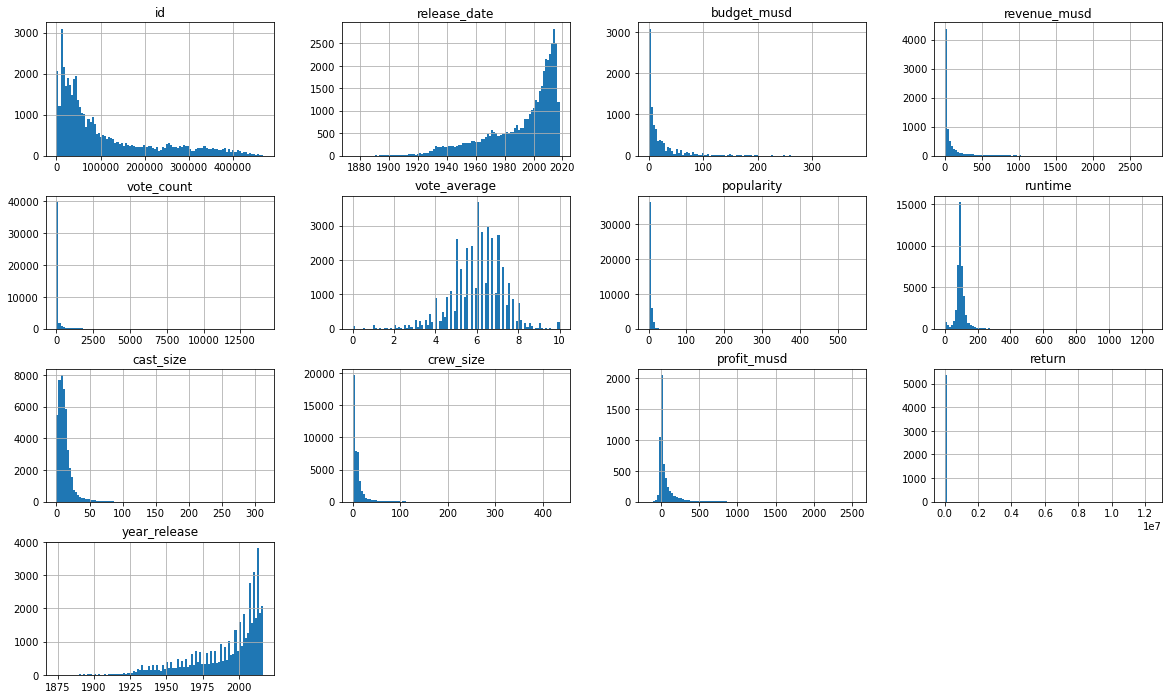

In [5]:
df.hist(figsize = (20,12), bins=100)
plt.show()

Not much Anomaly found and we can work with it, the only concern is there is many "0" values in some columns that will be into consideration to put into our analysis 

In [6]:
plt.style.use("seaborn")

## Movies Analysis 

### Movies Made Each Year

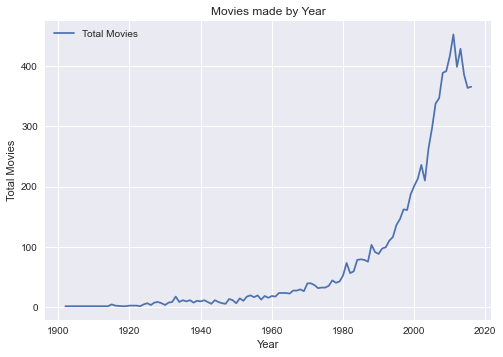

In [7]:
df1 = df[(df["year_release"] < 2017) & (df["budget_musd"] > 0)].groupby(by="year_release").agg(Total_Movie = ("title", "count"),
                                                                                        Average_Budget = ("budget_musd", "mean"))

plt.plot(df1.index, df1["Total_Movie"], label="Total Movies")

plt.title("Movies made by Year")

plt.xlabel("Year")
plt.ylabel("Total Movies")

plt.legend()

plt.show()

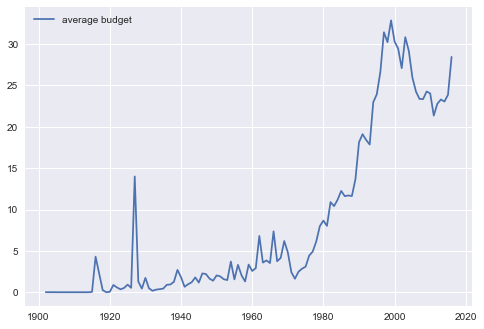

In [8]:
plt.plot(df1.index, df1["Average_Budget"], label="average budget")
plt.legend()
plt.show()

**Conclusion** :

from this chart we concluded, the films released each year have increased. especially since the 90s there has been a significant increase and continues to increase until now. In conclusion, the film industry is always growing

### The Usual runtime for every movies

In [9]:
df["runtime"].value_counts(bins=100).head(10)

(88.85, 101.4]     15294
(76.3, 88.85]       7685
(101.4, 113.95]     7502
(113.95, 126.5]     3910
(63.75, 76.3]       2245
(126.5, 139.05]     1636
(51.2, 63.75]        972
(-0.256, 13.55]      777
(139.05, 151.6]      734
(38.65, 51.2]        434
Name: runtime, dtype: int64

most of the films produced are made with durations ranging from 88 to 101 minutes

### Correlation Plot Beetwen Budget and Revenue 

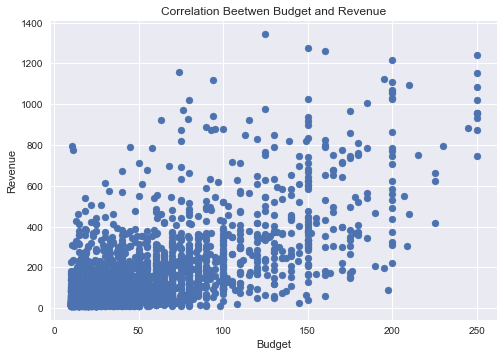

In [10]:
df2 = df[(df["revenue_musd"].between(10, 1500)) & (df["budget_musd"].between(10,250))].copy()

plt.scatter(df2["budget_musd"], df2["revenue_musd"])
plt.title("Correlation Beetwen Budget and Revenue")

plt.xlabel("Budget")
plt.ylabel("Revenue")

plt.show()

**In Conclusion** :

The plot seems positive but weak in association beetwen Budget and Revenue in movies production, and from the chart we can see it is non linear beetwen two variables. In conclusion we see there is no correlation beetwen Budget and Revenue in Film industry, high budget movie doesn't always mean high revenue and the opposite can be said the same.

### What Word Occur the Most in the Film's Title

In [11]:
from wordcloud import WordCloud

In [12]:
tag = df["title"].dropna()
titles = ' '.join(tag) #join / concatenate all tagline into one sentence

wcloud = WordCloud(background_color="white", height=2000, width=4000, max_words=200).generate(titles)

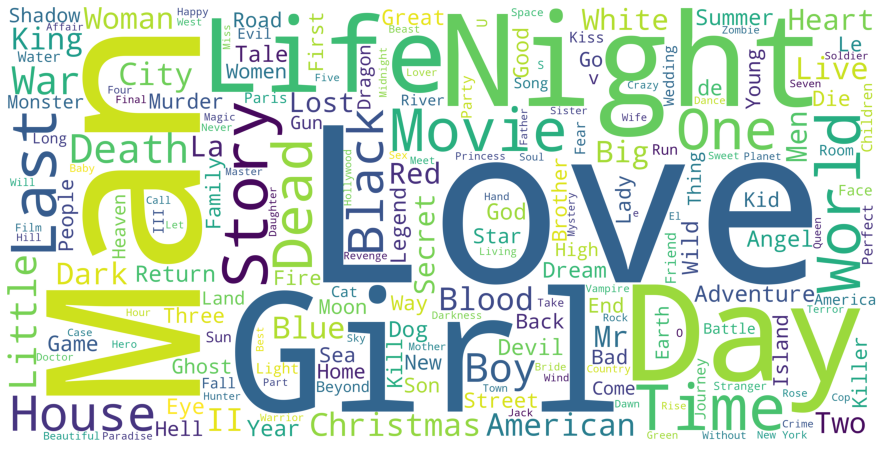

In [13]:
plt.figure(figsize=(16,8))
plt.imshow(wcloud)
plt.axis("off")
plt.show()

Word like **Love**, **Man**, and **Girl** are sure appear most frequently in movie titles. and followed by other words we can see on the picture above, the bigger the word the more often it appears.

### Analysis on Best to Worst Movies

In [14]:
from IPython.display import HTML

In [15]:
df_best = df[(df["revenue_musd"] > 0) & (df["budget_musd"] > 0)].copy()

In [16]:
def best_worst(n, by, ascending=False):
    df2= df_best[["title", "poster_path", "budget_musd", "revenue_musd", "profit_musd"]].sort_values(by = by, ascending = ascending).head(n).copy()
    
    df2.index = np.arange(1, len(df2) + 1)

    return HTML(df2.to_html(escape=False))

#### Highest Budget Movies

In [17]:
best_worst(5, "budget_musd")

,title,poster_path,budget_musd,revenue_musd,profit_musd
1,Pirates of the Caribbean: On Stranger Tides,,380.00,1045.71,665.71
2,Pirates of the Caribbean: At World's End,,300.00,961.00,661.00
3,Avengers: Age of Ultron,,280.00,1405.40,1125.40
4,Superman Returns,,270.00,391.08,121.08
5,Tangled,,260.00,591.79,331.79


#### Highest Revenue Movie

In [18]:
best_worst(5, "revenue_musd")

,title,poster_path,budget_musd,revenue_musd,profit_musd
1,Avatar,,237.00,2787.97,2550.97
2,Star Wars: The Force Awakens,,245.00,2068.22,1823.22
3,Titanic,,200.00,1845.03,1645.03
4,The Avengers,,220.00,1519.56,1299.56
5,Jurassic World,,150.00,1513.53,1363.53


#### Highest Provitable Movie

In [19]:
best_worst(5, "profit_musd")

,title,poster_path,budget_musd,revenue_musd,profit_musd
1,Avatar,,237.00,2787.97,2550.97
2,Star Wars: The Force Awakens,,245.00,2068.22,1823.22
3,Titanic,,200.00,1845.03,1645.03
4,Jurassic World,,150.00,1513.53,1363.53
5,Furious 7,,190.00,1506.25,1316.25


#### Worst Movie (Based on Profit)

In [20]:
best_worst(5, "profit_musd", ascending=True)

,title,poster_path,budget_musd,revenue_musd,profit_musd
1,The Lone Ranger,,255.00,89.29,-165.71
2,The Alamo,,145.00,25.82,-119.18
3,Mars Needs Moms,,150.00,38.99,-111.01
4,Valerian and the City of a Thousand Planets,,197.47,90.02,-107.45
5,The 13th Warrior,,160.00,61.70,-98.30


**In Conclusion** :

The top 5 films both based on income and profit have not changed much in the ranking above, and **Avatar** still comes out on top. Interestingly, the most Big Budgets movie on this ranking are not even in the top 5 in terms of income or profit. 

but what is certain is that __The Lone Ranger__ remains the worst film in terms of revenue, even though the budget is relatively large. this proves our previous conclusion that even a big budget movie still can't be guarantee to success.

## Franchise Analysis

In [21]:
df["Franchise"] = df["belongs_to_collection"].apply(lambda x: "Franchise" if isinstance(x, str) else "Non Franchise")

In [22]:
df.groupby(by = "Franchise").revenue_musd.mean()

Franchise
Franchise       165.71
Non Franchise    44.74
Name: revenue_musd, dtype: float64

In [23]:
df.groupby(by = "Franchise").profit_musd.mean()

Franchise
Franchise       148.88
Non Franchise    32.95
Name: profit_musd, dtype: float64

In [24]:
df_franc = df.groupby(by = "Franchise").agg(Total_Movies = ("title", "count"), 
                                Average_Budget = ("budget_musd", "mean"),
                                Average_Revenue = ("revenue_musd", "mean"),
                                Popularity_Index = ("popularity", "mean"))

In [25]:
df_franc

,Total_Movies,Average_Budget,Average_Revenue,Popularity_Index
Franchise,,,,
Franchise,4463,38.32,165.71,6.25
Non Franchise,40228,18.05,44.74,2.59


In [26]:
df_franc.replace({False: 0, True: 1}, inplace=True)

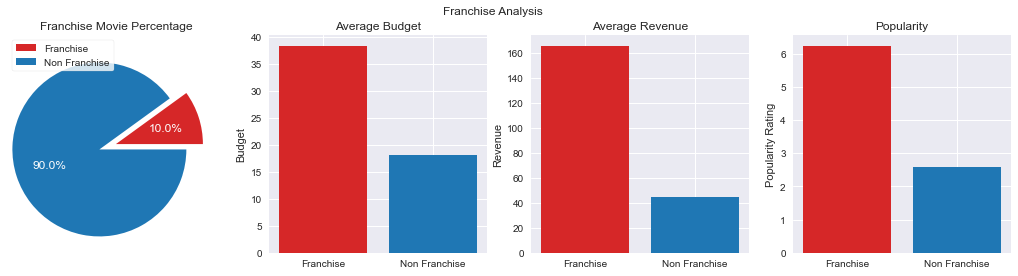

In [27]:
fig, (f1, f2, f3, f4) = plt.subplots(nrows=1, ncols=4)
fig.set_size_inches(18, 4)
f1.pie(df_franc["Total_Movies"], autopct="%1.1f%%", explode=[0,0.2], colors=["tab:red","tab:blue"], textprops={'color':"w", 'fontsize':'12'})
f2.bar(df_franc.index, df_franc["Average_Budget"], color = ["tab:red","tab:blue"])
f3.bar(df_franc.index, df_franc["Average_Revenue"], color = ["tab:red","tab:blue"])
f4.bar(df_franc.index, df_franc["Popularity_Index"], color = ["tab:red","tab:blue"])

legend_f1 = f1.legend(labels=df_franc.index, frameon = True, facecolor="white", loc="upper left")

f1.set_title("Franchise Movie Percentage")
f2.set_title("Average Budget")
f2.set_ylabel("Budget")
f3.set_title("Average Revenue")
f3.set_ylabel("Revenue")
f4.set_title("Popularity")
f4.set_ylabel("Popularity Rating")

fig.suptitle("Franchise Analysis")
plt.show()

On Average Franchise Movie always high on every aspect. Franchise Movie tends to be high in budget, also higher in terms of it's revenue and profit. only 10% of the total Movies is identified as a franchise movie, and it's proven to be more successfull than a non franchise Movie.

In [28]:
franchises = df.groupby(by = "belongs_to_collection").agg(Total_Movies = ("title", "count"), 
                                Average_Budget = ("budget_musd", "mean"),
                                Total_Budget = ("budget_musd", "sum"),
                                Average_Revenue = ("revenue_musd", "mean"),
                                Total_Revenue = ("revenue_musd", "sum"),
                                Average_Profit = ("profit_musd", "mean"),
                                Total_Profit = ("profit_musd", "sum"),
                                Popularity = ("popularity", "mean"))

### Best and Worst Franchises

We call if a Franchise is valid if it's have atleast 3 Movies

#### Best Franchises Based on Total Films

In [29]:
franchises.nlargest(5, columns="Total_Movies")

,Total_Movies,Average_Budget,Total_Budget,Average_Revenue,Total_Revenue,Average_Profit,Total_Profit,Popularity
belongs_to_collection,,,,,,,,
The Bowery Boys,29,NaN,0.00,NaN,0.00,NaN,0.00,0.20
Totò Collection,27,NaN,0.00,NaN,0.00,NaN,0.00,1.05
James Bond Collection,26,59.22,1539.65,273.35,7106.97,214.13,5567.32,13.45
Zatôichi: The Blind Swordsman,26,NaN,0.00,NaN,0.00,NaN,0.00,1.10
The Carry On Collection,25,NaN,0.00,NaN,0.00,NaN,0.00,3.22


#### Best Franchise Based on Total Revenue

In [30]:
franchises.nlargest(5, columns="Total_Revenue")

,Total_Movies,Average_Budget,Total_Budget,Average_Revenue,Total_Revenue,Average_Profit,Total_Profit,Popularity
belongs_to_collection,,,,,,,,
Harry Potter Collection,8,160.00,1280.00,963.42,7707.37,803.42,6427.37,26.25
Star Wars Collection,8,106.79,854.35,929.31,7434.49,822.52,6580.14,23.41
James Bond Collection,26,59.22,1539.65,273.35,7106.97,214.13,5567.32,13.45
The Fast and the Furious Collection,8,126.12,1009.00,640.64,5125.10,514.51,4116.10,10.80
Pirates of the Caribbean Collection,5,250.00,1250.00,904.32,4521.58,654.32,3271.58,53.97


#### Best Franchise Based on Total Profit

In [31]:
franchises[franchises["Total_Movies"] >= 3].nlargest(5, columns="Total_Profit")

,Total_Movies,Average_Budget,Total_Budget,Average_Revenue,Total_Revenue,Average_Profit,Total_Profit,Popularity
belongs_to_collection,,,,,,,,
Star Wars Collection,8,106.79,854.35,929.31,7434.49,822.52,6580.14,23.41
Harry Potter Collection,8,160.00,1280.00,963.42,7707.37,803.42,6427.37,26.25
James Bond Collection,26,59.22,1539.65,273.35,7106.97,214.13,5567.32,13.45
The Fast and the Furious Collection,8,126.12,1009.00,640.64,5125.10,514.51,4116.10,10.80
Transformers Collection,5,193.00,965.00,873.22,4366.10,680.22,3401.10,14.43


#### Best Franchises Based on Average Revenue

In [32]:
franchises[franchises["Total_Movies"] >= 3].nlargest(5, columns="Average_Revenue")

,Total_Movies,Average_Budget,Total_Budget,Average_Revenue,Total_Revenue,Average_Profit,Total_Profit,Popularity
belongs_to_collection,,,,,,,,
The Hobbit Collection,3,250.00,750.00,978.51,2935.52,728.51,2185.52,25.21
The Lord of the Rings Collection,3,88.67,266.00,972.18,2916.54,883.51,2650.54,30.27
Harry Potter Collection,8,160.00,1280.00,963.42,7707.37,803.42,6427.37,26.25
Star Wars Collection,8,106.79,854.35,929.31,7434.49,822.52,6580.14,23.41
Despicable Me Collection,6,74.75,299.00,922.77,3691.07,848.02,3392.07,106.72


#### Best Franchise Based on Average Profit

In [33]:
franchises[franchises["Total_Movies"] >= 3].nlargest(5, columns="Average_Profit")

,Total_Movies,Average_Budget,Total_Budget,Average_Revenue,Total_Revenue,Average_Profit,Total_Profit,Popularity
belongs_to_collection,,,,,,,,
The Lord of the Rings Collection,3,88.67,266.00,972.18,2916.54,883.51,2650.54,30.27
Despicable Me Collection,6,74.75,299.00,922.77,3691.07,848.02,3392.07,106.72
Star Wars Collection,8,106.79,854.35,929.31,7434.49,822.52,6580.14,23.41
Harry Potter Collection,8,160.00,1280.00,963.42,7707.37,803.42,6427.37,26.25
The Lion King Collection,4,45.00,45.00,788.24,788.24,743.24,743.24,11.48


#### Worst Franchise

In [34]:
franchises[franchises["Total_Movies"] >= 3].nsmallest(5, columns="Average_Profit")

,Total_Movies,Average_Budget,Total_Budget,Average_Revenue,Total_Revenue,Average_Profit,Total_Profit,Popularity
belongs_to_collection,,,,,,,,
Final Fantasy Collection,4,137.00,137.00,42.70,85.40,-51.87,-51.87,8.93
Tekken Collection,3,30.00,30.00,0.97,0.97,-29.03,-29.03,8.47
Swan Princess Series,3,37.50,75.00,9.77,9.77,-25.23,-25.23,5.24
BloodRayne Collection,3,15.00,45.00,2.41,2.41,-22.59,-22.59,5.66
Dungeons & Dragons Collection,3,23.50,47.00,15.19,15.19,-19.81,-19.81,5.34


**In Conclusion** :

Franchise films are proven to be more successful than those who are not, based on the analysis we get. **Harry Potter** and **Star Wars** franchises are the most **Successful** franchises in terms of revenue and profit from all of their respective 8 films. while **The Hobbit** and **Lord of the Rings** franchises on average generate more revenue and profits in each of their films where they only produce only a total of 3 films in each franchise. 

And the **worst** performing franchise in the industry is held by the **Final Fantasy** franchise which recorded minus revenue in their overall film production.

## Director Analysis

### Director who directs the most films

In [35]:
df["director"].value_counts().nlargest(10)

John Ford           66
Michael Curtiz      65
Werner Herzog       54
Alfred Hitchcock    53
Georges Méliès      49
Woody Allen         49
Jean-Luc Godard     46
Sidney Lumet        46
Charlie Chaplin     44
Raoul Walsh         43
Name: director, dtype: int64

In [36]:
dir = df.groupby(by = "director").agg(Total_Movies = ("title", "count"), 
                                Average_Budget = ("budget_musd", "mean"),
                                Total_Budget = ("budget_musd", "sum"),
                                Average_Revenue = ("revenue_musd", "mean"),
                                Total_Revenue = ("revenue_musd", "sum"),
                                Average_Profit = ("profit_musd", "mean"),
                                Total_Profit = ("profit_musd", "sum"),
                                Popularity = ("popularity", "mean"))

#### Most Succesfull Director Based On Total Revenue & Profit

In [37]:
dir.nlargest(5, columns="Total_Revenue")

,Total_Movies,Average_Budget,Total_Budget,Average_Revenue,Total_Revenue,Average_Profit,Total_Profit,Popularity
director,,,,,,,,
Steven Spielberg,33,56.03,1736.95,308.55,9256.62,250.67,7520.12,13.02
Peter Jackson,13,102.06,1326.78,593.48,6528.24,472.93,5202.24,18.84
Michael Bay,13,128.46,1670.00,495.19,6437.47,366.73,4767.47,12.78
James Cameron,11,84.45,760.05,737.58,5900.61,642.59,5140.71,28.07
David Yates,9,189.17,1135.00,889.09,5334.56,699.93,4199.56,19.99


In [38]:
dir.nlargest(5, columns="Total_Profit")

,Total_Movies,Average_Budget,Total_Budget,Average_Revenue,Total_Revenue,Average_Profit,Total_Profit,Popularity
director,,,,,,,,
Steven Spielberg,33,56.03,1736.95,308.55,9256.62,250.67,7520.12,13.02
Peter Jackson,13,102.06,1326.78,593.48,6528.24,472.93,5202.24,18.84
James Cameron,11,84.45,760.05,737.58,5900.61,642.59,5140.71,28.07
Michael Bay,13,128.46,1670.00,495.19,6437.47,366.73,4767.47,12.78
David Yates,9,189.17,1135.00,889.09,5334.56,699.93,4199.56,19.99


**In Conclusin** :

The top 5 Most Succesfull Director based on Profit and it's Revenue not much has changed, the top 5 directors is still filled with the same director, only the ranking is slightly different. But **Steven Spielberg** always comes on top with higher Movies he produces, also he makes the most Revenues and Profit from his film to the Studio. 

## Actor Analysis

In [39]:
df.set_index("id", inplace=True)

In [40]:
act = df["cast"].str.split("|", expand=True)

In [41]:
act = act.stack().reset_index(level=1, drop=True).to_frame()

In [42]:
act.columns = ["actor"]

In [43]:
act = act.merge(df[["title", "popularity", "revenue_musd", "budget_musd", "profit_musd"]], how="left", left_index=True, right_index=True) 

In [44]:
act["actor"].nunique()

201501

### Actor with the most roles in the Film

In [45]:
act["actor"].value_counts().head(10)

Bess Flowers         240
Christopher Lee      148
John Wayne           125
Samuel L. Jackson    122
Michael Caine        110
Gérard Depardieu     109
John Carradine       109
Jackie Chan          108
Donald Sutherland    108
Frank Welker         107
Name: actor, dtype: int64

In [46]:
act = act.groupby(by = "actor").agg(Total_Movies = ("title", "count"), 
                                Average_Budget = ("budget_musd", "mean"),
                                Total_Budget = ("budget_musd", "sum"),
                                Average_Revenue = ("revenue_musd", "mean"),
                                Total_Revenue = ("revenue_musd", "sum"),
                                Average_Profit = ("profit_musd", "mean"),
                                Total_Profit = ("profit_musd", "sum"),
                                Popularity = ("popularity", "mean"))

### Most Successfull Actor Based on Movie's Revenue

In [47]:
act.nlargest(5, columns="Total_Revenue")

,Total_Movies,Average_Budget,Total_Budget,Average_Revenue,Total_Revenue,Average_Profit,Total_Profit,Popularity
actor,,,,,,,,
Stan Lee,48,152.80,4889.50,647.17,19414.96,484.37,14530.96,29.94
Samuel L. Jackson,122,59.95,4855.67,213.87,17109.62,172.64,12257.74,11.70
Warwick Davis,34,107.67,2476.37,662.80,13256.03,540.54,10810.78,13.09
Frank Welker,107,71.72,3083.93,326.10,13044.15,262.30,9967.52,9.57
John Ratzenberger,46,101.31,2938.00,449.86,12596.13,357.64,9656.33,10.96


### Most Successfull Actor Based on Movie's Profit

In [48]:
act.nlargest(5, columns="Total_Profit")

,Total_Movies,Average_Budget,Total_Budget,Average_Revenue,Total_Revenue,Average_Profit,Total_Profit,Popularity
actor,,,,,,,,
Stan Lee,48,152.80,4889.50,647.17,19414.96,484.37,14530.96,29.94
Samuel L. Jackson,122,59.95,4855.67,213.87,17109.62,172.64,12257.74,11.70
Warwick Davis,34,107.67,2476.37,662.80,13256.03,540.54,10810.78,13.09
Frank Welker,107,71.72,3083.93,326.10,13044.15,262.30,9967.52,9.57
Jess Harnell,35,114.05,2509.00,611.73,12234.61,488.78,9775.61,10.92


### Most Successfull Actor Based on Movie's Popularity

In [68]:
act[act["Total_Movies"] >= 30].nlargest(5, columns="Popularity")

,Total_Movies,Average_Budget,Total_Budget,Average_Revenue,Total_Revenue,Average_Profit,Total_Profit,Popularity
actor,,,,,,,,
Stan Lee,48,152.80,4889.50,647.17,19414.96,484.37,14530.96,29.94
Geoffrey Rush,42,91.68,2292.00,304.68,8531.13,256.24,6149.79,26.35
Steve Carell,34,50.52,1414.60,240.67,6979.52,198.03,5544.83,25.93
Sandra Bullock,38,44.59,1248.50,181.56,4902.16,149.46,3736.62,22.49
Zoe Saldana,34,69.61,1809.83,300.29,7206.98,235.38,5413.71,21.11


**In Conclusion :**

Without a doubt **Stan Lee** is a most successfull actor who brings fortune to the films he stars in. although he maybe only had a small cameo role. it proved that the film he starred in was mostly successful in the industry.

> As a note, this analysis has limitations. because we take an analysis of all roles including cameos in the film without considering important roles such as the *main character*, *supporting actor*, and *other roles* that are in the making of the film.

## Production House Analysis

In [50]:
prod = df["production_companies"].str.split("|", expand=True)

In [51]:
prod = prod.stack().reset_index(level=1, drop=True).to_frame()

In [52]:
prod = prod.merge(df[["title", "popularity", "revenue_musd", "budget_musd", "profit_musd"]], how="left", left_index=True, right_index=True) 

In [53]:
prod.rename(columns = {0:'production_companies'}, inplace = True)

In [54]:
prod = prod.groupby("production_companies").agg(Total_Movies = ("title", "count"), 
                                Average_Budget = ("budget_musd", "mean"),
                                Total_Budget = ("budget_musd", "sum"),
                                Average_Revenue = ("revenue_musd", "mean"),
                                Total_Revenue = ("revenue_musd", "sum"),
                                Average_Profit = ("profit_musd", "mean"),
                                Total_Profit = ("profit_musd", "sum"),
                                Popularity = ("popularity", "mean"))

### Studios with the Most Films Produced

In [55]:
prod.nlargest(5, columns="Total_Movies")

,Total_Movies,Average_Budget,Total_Budget,Average_Revenue,Total_Revenue,Average_Profit,Total_Profit,Popularity
production_companies,,,,,,,,
Warner Bros.,1248,48.37,23557.27,129.38,63525.19,93.28,38989.62,6.22
Metro-Goldwyn-Mayer (MGM),1073,23.64,5343.52,59.79,12376.79,42.04,6895.18,2.92
Paramount Pictures,996,40.65,16299.55,124.10,48769.40,94.36,31893.76,5.68
Twentieth Century Fox Film Corporation,834,40.65,13415.69,139.85,47687.75,112.60,33328.53,6.30
Universal Pictures,827,40.47,17604.42,119.35,55259.19,94.66,36537.01,7.76


### Most Successfull Studio Based on it's Total Revenue

In [56]:
prod.nlargest(5, columns="Total_Revenue")

,Total_Movies,Average_Budget,Total_Budget,Average_Revenue,Total_Revenue,Average_Profit,Total_Profit,Popularity
production_companies,,,,,,,,
Warner Bros.,1248,48.37,23557.27,129.38,63525.19,93.28,38989.62,6.22
Universal Pictures,827,40.47,17604.42,119.35,55259.19,94.66,36537.01,7.76
Paramount Pictures,996,40.65,16299.55,124.10,48769.40,94.36,31893.76,5.68
Twentieth Century Fox Film Corporation,834,40.65,13415.69,139.85,47687.75,112.60,33328.53,6.30
Walt Disney Pictures,262,82.50,12787.14,277.80,40837.27,212.60,28063.25,12.46


### Most Successfull Studio Based on it's Total Profit

In [79]:
prod.nlargest(5, columns="Total_Profit")

,Total_Movies,Average_Budget,Total_Budget,Average_Revenue,Total_Revenue,Average_Profit,Total_Profit,Popularity
production_companies,,,,,,,,
Warner Bros.,1248,48.37,23557.27,129.38,63525.19,93.28,38989.62,6.22
Universal Pictures,827,40.47,17604.42,119.35,55259.19,94.66,36537.01,7.76
Twentieth Century Fox Film Corporation,834,40.65,13415.69,139.85,47687.75,112.60,33328.53,6.30
Paramount Pictures,996,40.65,16299.55,124.10,48769.40,94.36,31893.76,5.68
Walt Disney Pictures,262,82.50,12787.14,277.80,40837.27,212.60,28063.25,12.46


**In Conclusion :**

Based on the number of films produced, total revenue, to profit margins. it can be concluded that **Warner Bros (WB)** is the most successful production company based on these findings, which is always in first place in each category.

but if you pay attention, in the Income and Profits table in 5th position there is a **Disney** studio that is included in the ranking, and it is far away in terms of the number of films produced compared to other studios which produce far more films than Disney, but even though it is a little Disney does not lose in terms of income and profit. while **MGM**, which was in the top 5 in the number of films produced, lost in terms of income and profits.

In the graph below, you can see WB's superiority on any level, Disney which is on its own level, and MGM's position which doesn't look good enough from other studios which occupy the top positions in total production.

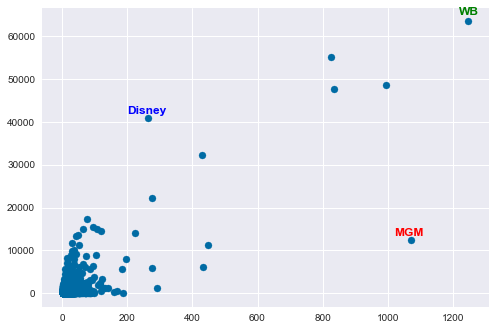

In [101]:
plt.scatter(prod["Total_Movies"], prod["Total_Revenue"])
plt.text(200, 42000, 'Disney', fontsize = 12, fontweight = "bold", color = "blue")
plt.text(1220, 65000, 'WB', fontsize = 12, fontweight = "bold", color = "green")
plt.text(1020, 13500, 'MGM', fontsize = 12, fontweight = "bold", color = "red")
plt.show()

## Genre Analysis

In [58]:
from datetime import datetime

In [59]:
def generation(x):
    if x >= datetime.strptime("01/01/2010", "%d/%m/%Y"):
        return "2010s"
    if x >= datetime.strptime("01/01/2000", "%d/%m/%Y"):
        return "2000s"
    if x >= datetime.strptime("01/01/1990", "%d/%m/%Y"):
        return "1990s"
    if x >= datetime.strptime("01/01/1980", "%d/%m/%Y"):
        return "1980s"
    else:
        return "Older than 70s"

df["gen_time"] = df["release_date"].apply(lambda x: generation(x))

In [60]:
gen = df["genres"].str.split("|", expand=True)

In [61]:
gen = gen.stack().reset_index(level=1, drop=True).to_frame()

In [62]:
gen = gen.merge(df[["title", "director", "budget_musd", "revenue_musd", "gen_time"]], how="left", left_index=True, right_index=True)

In [63]:
gen.rename(columns = {0:'genre'}, inplace = True)

In [64]:
gen["genre"].nunique()

20

In [65]:
tes = gen.pivot_table(values="title", index="genre", columns="gen_time", 
                aggfunc="count")

### Most Popular Genre in Every Decade

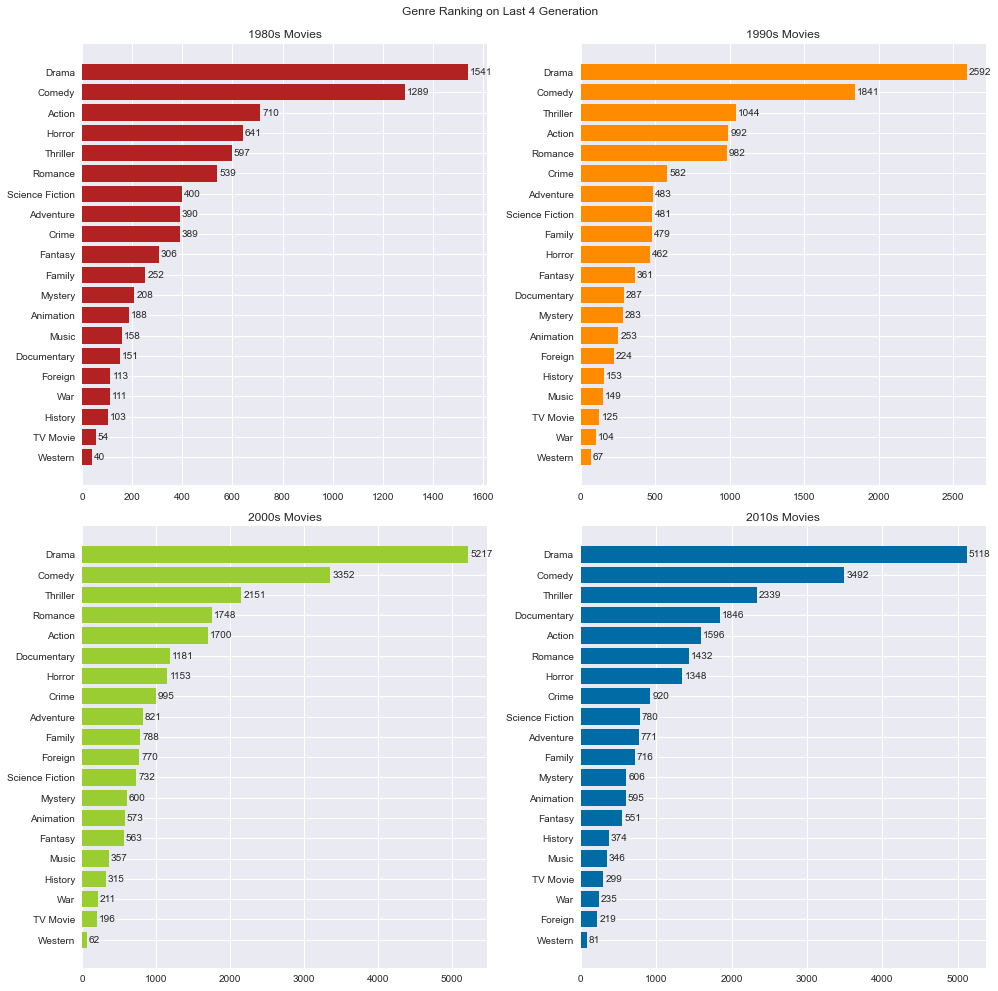

In [66]:
g80 = tes[["1980s"]].sort_values(by = "1980s")
g90 = tes[["1990s"]].sort_values(by = "1990s")
g00 = tes[["2000s"]].sort_values(by = "2000s")
g10 = tes[["2010s"]].sort_values(by = "2010s")

plt.style.use("tableau-colorblind10")
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(14, 14))
fig.suptitle("Genre Ranking on Last 4 Generation\n")

g80 = ax1.barh(g80.index, g80["1980s"], color="firebrick")
ax1.bar_label(g80, padding=2)
ax1.set_title("1980s Movies")

g90 = ax2.barh(g90.index, g90["1990s"], color="darkorange")
ax2.bar_label(g90, padding=2)
ax2.set_title("1990s Movies")

g00 = ax3.barh(g00.index, g00["2000s"], color="yellowgreen")
ax3.bar_label(g00, padding=2)
ax3.set_title("2000s Movies")

g10 = ax4.barh(g10.index, g10["2010s"])
ax4.bar_label(g10, padding=2)
ax4.set_title("2010s Movies")

plt.tight_layout()
plt.show()

**In Conclusion :**

as we can see **Drama** and **Comedy** Genre always on Top in every Generation, followed by **Thriller** and **Action** who always stays on the Top 5. and there is a Genre like Romance, Horror and Documentary who have it's up and down in every decade